In [1]:
import pandas as pd

In [2]:
srsSeries = pd.Series([1, 3, 5])
print(srsSeries)

0    1
1    3
2    5
dtype: int64


In [3]:
dctData = {'Name': ['John', 'Anna', 'Peter'],
           'Age': [28, 24, 35]}
df = pd.DataFrame(dctData)

In [4]:
print(df)

    Name  Age
0   John   28
1   Anna   24
2  Peter   35


In [5]:
display(df)

Name  Age
0   John   28
1   Anna   24
2  Peter   35

In [6]:
dctDataFrameData = df.to_dict()
display(dctDataFrameData)

{'Name': {0: 'John', 1: 'Anna', 2: 'Peter'}, 'Age': {0: 28, 1: 24, 2: 35}}

In [7]:
df.to_excel('df.xlsx')

In [8]:
df.to_excel('df.xlsx', index = False)

In [9]:
display(df.head(1))
display(df.tail(1))

Name  Age
0  John   28

Name  Age
2  Peter   35

In [10]:
display(df.describe())

Age
count   3.000000
mean   29.000000
std     5.567764
min    24.000000
25%    26.000000
50%    28.000000
75%    31.500000
max    35.000000

In [11]:
display(df.describe(include = 'all'))

Name        Age
count      3   3.000000
unique     3        NaN
top     John        NaN
freq       1        NaN
mean     NaN  29.000000
std      NaN   5.567764
min      NaN  24.000000
25%      NaN  26.000000
50%      NaN  28.000000
75%      NaN  31.500000
max      NaN  35.000000

In [12]:
df['srsSeries'] = srsSeries
df

Name  Age  srsSeries
0   John   28          1
1   Anna   24          3
2  Peter   35          5

In [13]:
dfSeries = pd.DataFrame()
dfSeries['Series'] = srsSeries
dfSeries

Series
0       1
1       3
2       5

In [14]:
df['Name']
df[['Name', 'Age']]
print('The first row.')
display(df.iloc[0])
print('\n','The first column.')
display(df.iloc[:,0])

The first row.


Name         John
Age            28
srsSeries       1
Name: 0, dtype: object


 The first column.


0     John
1     Anna
2    Peter
Name: Name, dtype: object

In [15]:
rows_john = df.loc[df['Name'] == 'John']
display(rows_john)

Name  Age  srsSeries
0  John   28          1

In [16]:
dfMissingValues = {'Name': ['John', 'Anna', 'Peter', 'John', 'Anna'],
                   'Age': [28, None, 35, None, 30]}
df = pd.DataFrame(dfMissingValues)

intMean_age = df['Age'].mean()
inMedian_age = df['Age'].median()
intMax_age = df['Age'].max()
intMin_age = df['Age'].min()

intFilled_mean = df['Age'].fillna(intMean_age)
intFilled_median = df['Age'].fillna(inMedian_age)
intFilled_max = df['Age'].fillna(intMax_age)
intFilled_min = df['Age'].fillna(intMin_age)

dfFilled_Data = pd.DataFrame({'Original Age': df['Age'],
                              'Filled with Mean': intFilled_mean,
                              'Filled with Median': intFilled_median,
                              'Filled with Max': intFilled_max,
                              'Filled with Min': intFilled_min})
display(dfFilled_Data)

Original Age  Filled with Mean  Filled with Median  Filled with Max  \
0          28.0              28.0                28.0             28.0   
1           NaN              31.0                30.0             35.0   
2          35.0              35.0                35.0             35.0   
3           NaN              31.0                30.0             35.0   
4          30.0              30.0                30.0             30.0   

   Filled with Min  
0             28.0  
1             28.0  
2             35.0  
3             28.0  
4             30.0

In [17]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2']}, 
                    index = ['K0', 'K1', 'K2'])

df2 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']}, 
                    index = ['K0', 'K2', 'K3'])

result = pd.concat([df1, df2], axis = 1)

print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)
print("\nConcatenated Result:")
print(result)

DataFrame 1:
     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2

DataFrame 2:
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3

Concatenated Result:
      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df_qqq = yf.download("QQQ", start = "2015-01-01", end = "2023-09-01")
df_nvda = yf.download("NVDA", start = "2015-01-01", end = "2023-09-01")

df = pd.concat([df_qqq['Close'], df_nvda['Close']], axis = 1, join = 'inner')
df.columns = ['QQQ', 'NVDA']
df = df.pct_change(1)
display(df.head())

df['QQQ'] = df['QQQ'].shift(-1)
display(df.head())

df = df.dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


QQQ      NVDA
Date                          
2015-01-02       NaN       NaN
2015-01-05 -0.014669 -0.016890
2015-01-06 -0.013408 -0.030318
2015-01-07  0.012891 -0.002606
2015-01-08  0.019140  0.037618

QQQ      NVDA
Date                          
2015-01-02 -0.014669       NaN
2015-01-05 -0.013408 -0.016890
2015-01-06  0.012891 -0.030318
2015-01-07  0.019140 -0.002606
2015-01-08 -0.006583  0.037618

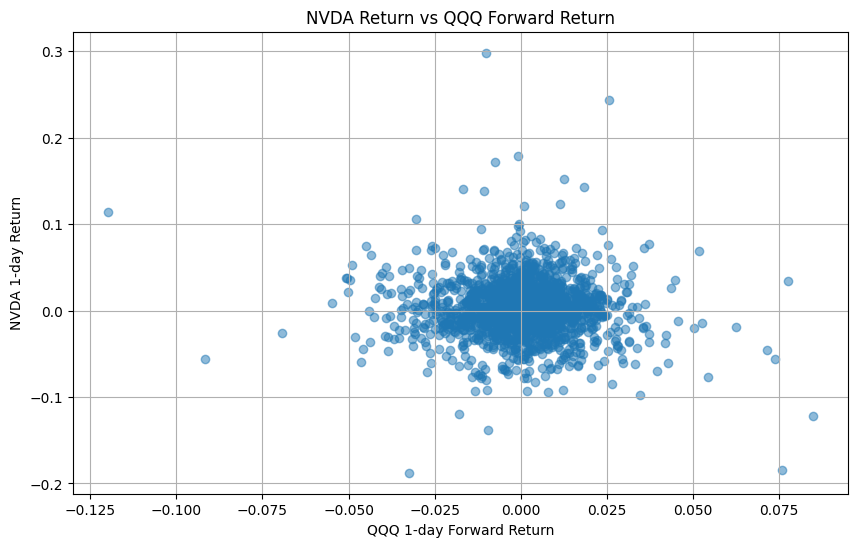

Correlation between NVDA return and QQQ forward return: -0.0514


In [20]:
plt.figure(figsize = (10, 6))
plt.scatter(df['QQQ'], df['NVDA'], alpha = 0.5)
plt.xlabel('QQQ 1-day Forward Return')
plt.ylabel('NVDA 1-day Return')
plt.title('NVDA Return vs QQQ Forward Return')
plt.grid(True)
plt.show()

correlation = df['QQQ'].corr(df['NVDA'])
print(f"Correlation between NVDA return and QQQ forward return: {correlation:.4f}")

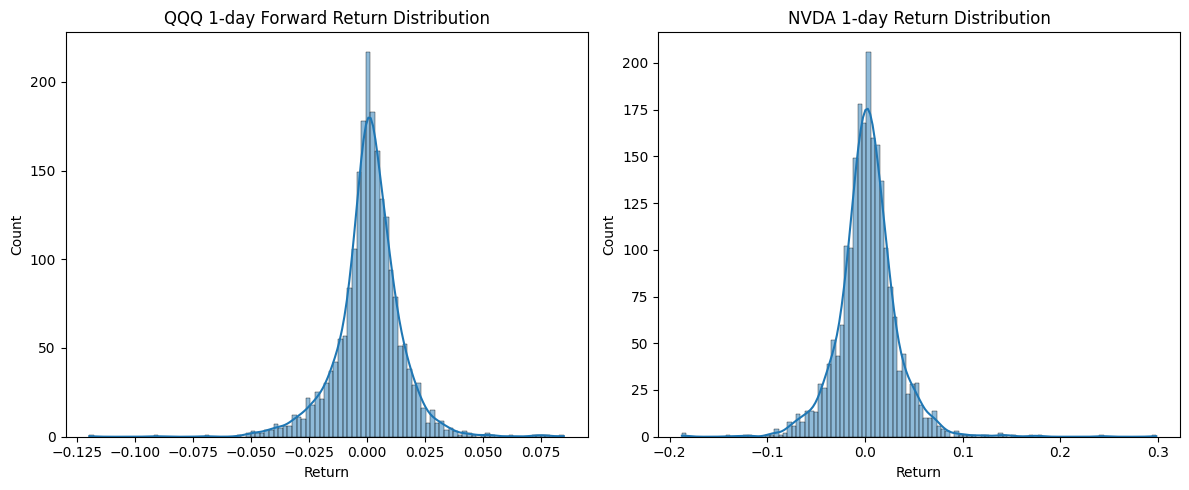

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

sns.histplot(df['QQQ'], kde = True, ax = ax1)
ax1.set_title('QQQ 1-day Forward Return Distribution')
ax1.set_xlabel('Return')

sns.histplot(df['NVDA'], kde = True, ax = ax2)
ax2.set_title('NVDA 1-day Return Distribution')
ax2.set_xlabel('Return')

plt.tight_layout()
plt.show()

In [22]:
df['NVDA_Quantile'] = pd.qcut(df['NVDA'], q = 5, labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

flt_avg_returns = df.groupby('NVDA_Quantile')['QQQ'].mean()

print("Average QQQ Forward Returns by NVDA Return Quantile:")
print(flt_avg_returns)

Average QQQ Forward Returns by NVDA Return Quantile:
NVDA_Quantile
Q1    0.001079
Q2    0.000415
Q3    0.001186
Q4    0.001311
Q5   -0.000470
Name: QQQ, dtype: float64


C:\Users\wodnj\AppData\Local\Temp\ipykernel_9420\2381972554.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flt_avg_returns = df.groupby('NVDA_Quantile')['QQQ'].mean()


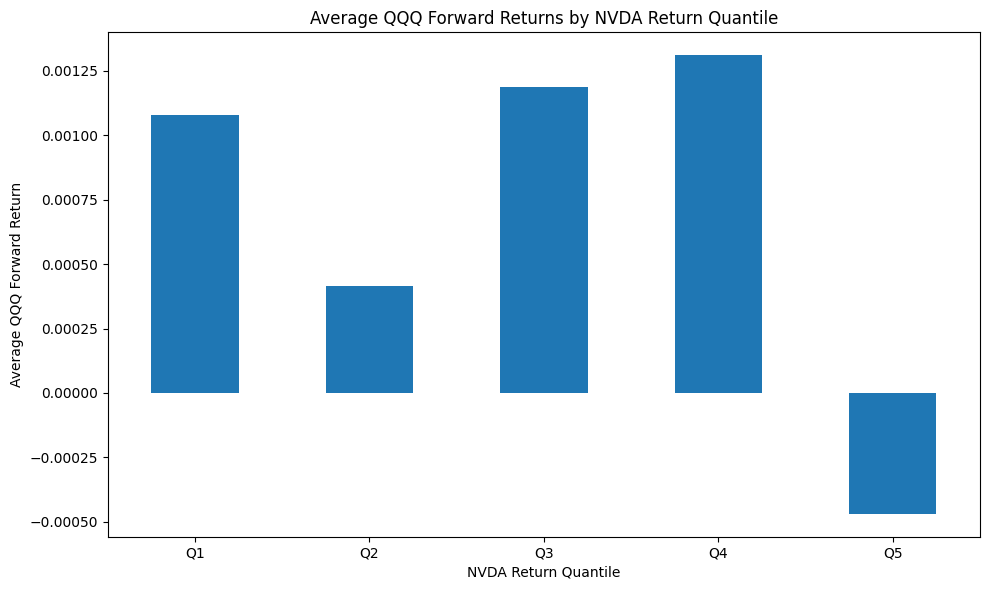

In [23]:
plt.figure(figsize = (10, 6))
flt_avg_returns.plot(kind = 'bar')
plt.title('Average QQQ Forward Returns by NVDA Return Quantile')
plt.xlabel('NVDA Return Quantile')
plt.ylabel('Average QQQ Forward Return')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()